In [40]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# health_data.csv

In [2]:
# Alcprobs1 = alcohol problem and has values 0-6
# Deviant1 = deviant behavior
# Vio1 = Violent behavior scale
# dep = depression
# paractv = parental activity 
# parpres = parental presence
# famconct = family connectedness
# esteem = self esteem

In [4]:
# We will consider the following clustering variables
[['ALCEVR1','MAREVER1','ALCPROBS1','DEVIANT1','VIOL1','DEP1','ESTEEM1','SCHCONN1','PARACTV','PARPRES','FAMCONCT']]

[['ALCEVR1',
  'MAREVER1',
  'ALCPROBS1',
  'DEVIANT1',
  'VIOL1',
  'DEP1',
  'ESTEEM1',
  'SCHCONN1',
  'PARACTV',
  'PARPRES',
  'FAMCONCT']]

In [5]:
data = pd.read_csv('health_data.csv')
data.head()

,BIO_SEX,age,TREG1,ALCEVR1,ALCPROBS1,marever1,cocever1,inhever1,cigavail,DEP1,ESTEEM1,VIOL1,PASSIST,DEVIANT1,SCHCONN1,GPA1,EXPEL1,FAMCONCT,PARACTV,PARPRES
0,2.0,NaN,0.0,1.0,2,1,0,0,0.0,10.0,47.0,4.0,0,5.0,NaN,NaN,0.0,24.3,8.0,15.0
1,2.0,19.427397,1.0,1.0,1,0,0,0,1.0,17.0,35.0,1.0,0,5.0,22.0,2.333333,0.0,23.3,9.0,15.0
2,1.0,NaN,0.0,0.0,0,0,0,0,0.0,2.0,45.0,0.0,0,1.0,30.0,2.250000,0.0,24.3,3.0,15.0
3,1.0,20.430137,1.0,0.0,0,1,1,1,1.0,19.0,47.0,4.0,1,4.0,19.0,2.000000,0.0,18.7,6.0,14.0
4,2.0,NaN,0.0,1.0,0,0,0,0,0.0,6.0,39.0,0.0,0,5.0,32.0,3.000000,0.0,20.0,9.0,6.0


In [6]:
data.tail()

,BIO_SEX,age,TREG1,ALCEVR1,ALCPROBS1,marever1,cocever1,inhever1,cigavail,DEP1,ESTEEM1,VIOL1,PASSIST,DEVIANT1,SCHCONN1,GPA1,EXPEL1,FAMCONCT,PARACTV,PARPRES
6499,2.0,14.260274,0.0,0.0,0,0,0,0,0.0,4.0,38.0,2.0,0,2.0,27.0,3.50,0.0,23.0,3.0,14.0
6500,1.0,NaN,0.0,0.0,0,0,0,0,0.0,2.0,35.0,0.0,1,0.0,32.0,3.00,0.0,23.3,9.0,15.0
6501,1.0,15.093151,1.0,1.0,4,1,0,0,1.0,25.0,50.0,13.0,0,2.0,14.0,1.00,0.0,23.7,9.0,13.0
6502,2.0,15.509589,0.0,0.0,0,0,0,0,0.0,13.0,29.0,1.0,1,6.0,26.0,3.00,0.0,21.3,1.0,12.0
6503,1.0,NaN,0.0,1.0,1,1,0,0,1.0,11.0,41.0,15.0,1,14.0,25.0,1.25,0.0,17.0,5.0,8.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6504 entries, 0 to 6503
Data columns (total 20 columns):
BIO_SEX      6503 non-null float64
age          4837 non-null float64
TREG1        6500 non-null float64
ALCEVR1      6444 non-null float64
ALCPROBS1    6504 non-null int64
marever1     6504 non-null int64
cocever1     6504 non-null int64
inhever1     6504 non-null int64
cigavail     6444 non-null float64
DEP1         6486 non-null float64
ESTEEM1      6483 non-null float64
VIOL1        6454 non-null float64
PASSIST      6504 non-null int64
DEVIANT1     6448 non-null float64
SCHCONN1     6368 non-null float64
GPA1         6274 non-null float64
EXPEL1       6486 non-null float64
FAMCONCT     6504 non-null float64
PARACTV      6477 non-null float64
PARPRES      6369 non-null float64
dtypes: float64(15), int64(5)
memory usage: 1016.3 KB


In [8]:
data.columns = map(str.upper, data.columns)


In [9]:
data = data.dropna()

In [10]:
data.head()

,BIO_SEX,AGE,TREG1,ALCEVR1,ALCPROBS1,MAREVER1,COCEVER1,INHEVER1,CIGAVAIL,DEP1,ESTEEM1,VIOL1,PASSIST,DEVIANT1,SCHCONN1,GPA1,EXPEL1,FAMCONCT,PARACTV,PARPRES
1,2.0,19.427397,1.0,1.0,1,0,0,0,1.0,17.0,35.0,1.0,0,5.0,22.0,2.333333,0.0,23.3,9.0,15.0
3,1.0,20.430137,1.0,0.0,0,1,1,1,1.0,19.0,47.0,4.0,1,4.0,19.0,2.000000,0.0,18.7,6.0,14.0
5,1.0,14.509589,0.0,0.0,0,0,0,0,0.0,8.0,41.0,3.0,0,0.0,27.0,2.666667,0.0,23.7,3.0,13.0
6,1.0,13.676712,0.0,0.0,0,0,0,0,1.0,4.0,42.0,5.0,0,7.0,18.0,2.500000,0.0,24.7,6.0,13.0
7,1.0,15.178082,1.0,1.0,0,1,0,0,1.0,4.0,40.0,8.0,1,6.0,20.0,1.500000,0.0,22.3,10.0,14.0


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4601 entries, 1 to 6502
Data columns (total 20 columns):
BIO_SEX      4601 non-null float64
AGE          4601 non-null float64
TREG1        4601 non-null float64
ALCEVR1      4601 non-null float64
ALCPROBS1    4601 non-null int64
MAREVER1     4601 non-null int64
COCEVER1     4601 non-null int64
INHEVER1     4601 non-null int64
CIGAVAIL     4601 non-null float64
DEP1         4601 non-null float64
ESTEEM1      4601 non-null float64
VIOL1        4601 non-null float64
PASSIST      4601 non-null int64
DEVIANT1     4601 non-null float64
SCHCONN1     4601 non-null float64
GPA1         4601 non-null float64
EXPEL1       4601 non-null float64
FAMCONCT     4601 non-null float64
PARACTV      4601 non-null float64
PARPRES      4601 non-null float64
dtypes: float64(15), int64(5)
memory usage: 754.9 KB


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [14]:
# We will consider the following clustering variables
cluster = data[['ALCEVR1','MAREVER1','ALCPROBS1','DEVIANT1','VIOL1','DEP1','ESTEEM1','SCHCONN1','PARACTV','PARPRES','FAMCONCT']]

In [15]:
# standardize our variables mean=0, sd=1

In [17]:
cluster_s = cluster.copy()

In [20]:
cluster_s['ALCEVR1'] = preprocessing.scale(cluster_s['ALCEVR1']).astype('float64')

In [21]:
cluster_s['MAREVER1'] = preprocessing.scale(cluster_s['MAREVER1']).astype('float64')

In [22]:
cluster_s['ALCPROBS1'] = preprocessing.scale(cluster_s['ALCPROBS1']).astype('float64')

In [23]:
cluster_s['DEVIANT1'] = preprocessing.scale(cluster_s['DEVIANT1']).astype('float64')

In [24]:
cluster_s['VIOL1'] = preprocessing.scale(cluster_s['VIOL1']).astype('float64')

In [25]:
cluster_s['DEP1'] = preprocessing.scale(cluster_s['DEP1']).astype('float64')

In [26]:
cluster_s['ESTEEM1'] = preprocessing.scale(cluster_s['ESTEEM1']).astype('float64')

In [27]:
cluster_s['SCHCONN1'] = preprocessing.scale(cluster_s['SCHCONN1']).astype('float64')

In [28]:
cluster_s['PARACTV'] = preprocessing.scale(cluster_s['PARACTV']).astype('float64')

In [29]:
cluster_s['PARPRES'] = preprocessing.scale(cluster_s['PARPRES']).astype('float64')

In [30]:
cluster_s['FAMCONCT'] = preprocessing.scale(cluster_s['FAMCONCT']).astype('float64')

In [ ]:
# let's do K means cluster analysis for 1 to 1 clusters

In [33]:
cluster_train, cluster_test = train_test_split(cluster_s, test_size = 0.3, random_state=222)

In [43]:
print(cluster_train.shape, cluster_test.shape)

(3220, 11) (1381, 11)


In [44]:
from scipy.spatial.distance import cdist

In [45]:
clusters = range(1,11)
mean_dist = []

In [51]:
for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(cluster_train)
    mean_dist.append(sum(np.min(cdist(cluster_train, model.cluster_centers_, 'euclidean'), axis=1))/cluster_train.shape[0])

In [52]:
print(cluster_train.shape[0])

3220


In [53]:
# let's plot the elbow curve

Text(0.5, 1.0, 'Elbow method for our k values')

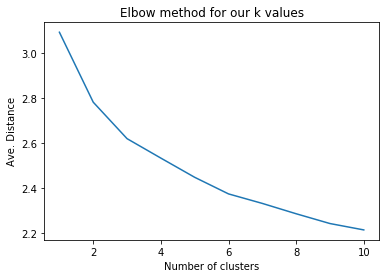

In [55]:
plt.plot(clusters, mean_dist)
plt.xlabel('Number of clusters')
plt.ylabel('Ave. Distance')
plt.title('Elbow method for our k values')

In [56]:
# canonical discriminate analysis  - is a data reduction technique which creates a smaller #'s of variables that are a linear combination of clusters

In [58]:
model1 = KMeans(n_clusters=3)
model1.fit(cluster_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [70]:
from sklearn.decomposition import PCA

In [59]:
pca_2 = PCA(2)

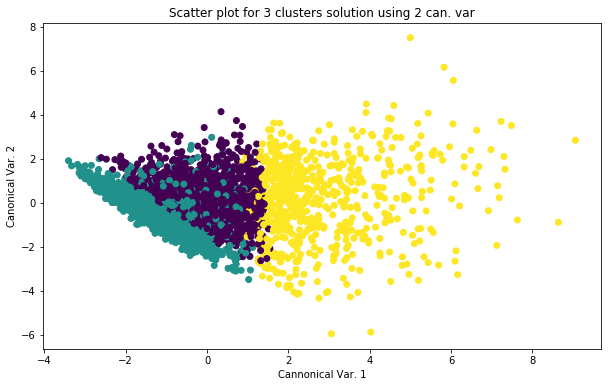

In [63]:
plt.figure(figsize=(10,6))
plot_columns = pca_2.fit_transform(cluster_train)
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=model1.labels_,)
plt.xlabel('Cannonical Var. 1')
plt.ylabel('Canonical Var. 2')
plt.title('Scatter plot for 3 clusters solution using 2 can. var')
plt.show()

In [64]:
#lets see 2 cluster solution

In [65]:
model2 = KMeans(n_clusters=2)
model2.fit(cluster_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [71]:
pca_2 = PCA(2)


In [75]:
plot_columns = pca_2.fit_transform(cluster_train)

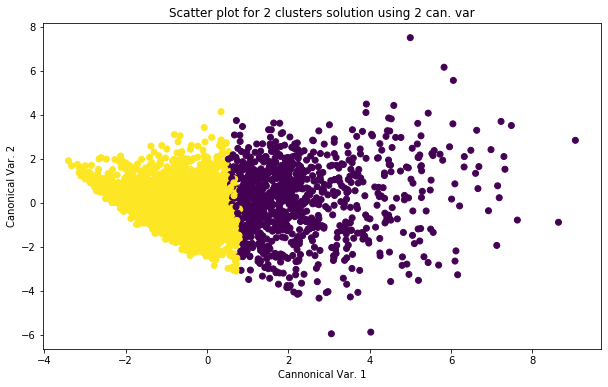

In [78]:
plt.figure(figsize=(10,6))
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=model2.labels_,)
plt.xlabel('Cannonical Var. 1')
plt.ylabel('Canonical Var. 2')
plt.title('Scatter plot for 2 clusters solution using 2 can. var')
plt.show()

In [85]:
# lets see 6 cluster solution

In [82]:
model3 = KMeans(n_clusters=6)
model3.fit(cluster_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [80]:
pca_2 = PCA(2)

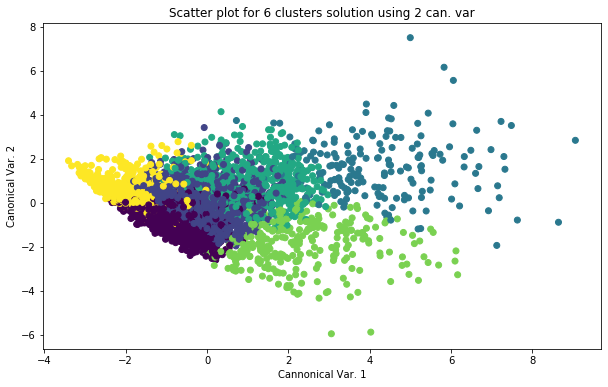

In [84]:
plt.figure(figsize=(10,6))
plt.scatter(x=plot_columns[:,0], y=plot_columns[:,1], c=model3.labels_,)
plt.xlabel('Cannonical Var. 1')
plt.ylabel('Canonical Var. 2')
plt.title('Scatter plot for 6 clusters solution using 2 can. var')
plt.show()